# Time Series Analysis and Prediction of Hyperliquid and Siacoin



# Data College & Understading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import os
from datetime import datetime

os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'

In [2]:
HYPE = pd.read_parquet('hype.parquet')
SIA = pd.read_parquet('SIA.parquet')

In [3]:
HYPE = HYPE.sort_values('timestamp').reset_index(drop=True)
SIA = SIA.sort_values('timestamp').reset_index(drop=True)

parquet info()

In [4]:
HYPE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeOpen   176 non-null    datetime64[us]
 1   timeClose  176 non-null    datetime64[us]
 2   timeHigh   176 non-null    datetime64[us]
 3   timeLow    176 non-null    datetime64[us]
 4   name       176 non-null    int64         
 5   open       176 non-null    float64       
 6   high       176 non-null    float64       
 7   low        176 non-null    float64       
 8   close      176 non-null    float64       
 9   volume     176 non-null    float64       
 10  marketCap  176 non-null    float64       
 11  timestamp  176 non-null    datetime64[us]
dtypes: datetime64[us](5), float64(6), int64(1)
memory usage: 16.6 KB


In [5]:
HYPE["name"] = HYPE["name"].apply(lambda x: "HYPE" if x == 2781 else x)

Hyperliquid basic information

In [6]:
print("Hyperliquid Data")
HYPE.head()

Hyperliquid Data


,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2024-11-30,2024-11-30 23:59:59.999,2024-11-30 16:22:00,2024-11-30 00:37:00,HYPE,6.415373,8.911731,6.199316,8.714291,3.679912e+08,0.000000e+00,2024-11-30 23:59:59.999
1,2024-12-01,2024-12-01 23:59:59.999,2024-12-01 06:25:00,2024-12-01 00:10:00,HYPE,8.602178,9.870714,8.203313,9.122230,3.230467e+08,0.000000e+00,2024-12-01 23:59:59.999
2,2024-12-02,2024-12-02 23:59:59.999,2024-12-02 02:37:00,2024-12-02 18:01:00,HYPE,9.491066,9.643155,7.211835,8.263359,2.813463e+08,2.238615e+09,2024-12-02 23:59:59.999
3,2024-12-03,2024-12-03 23:59:59.999,2024-12-03 22:47:00,2024-12-03 01:31:00,HYPE,8.415192,11.780560,7.748329,11.277477,2.154178e+08,3.055165e+09,2024-12-03 23:59:59.999
4,2024-12-04,2024-12-04 23:59:59.999,2024-12-04 11:49:00,2024-12-04 16:58:00,HYPE,11.082695,13.189475,10.754718,11.608662,2.984796e+08,3.144886e+09,2024-12-04 23:59:59.999


In [7]:
print("Hyperliquid Dimensional")
HYPE.shape

Hyperliquid Dimensional


(176, 12)

In [8]:
print('Hyperliquid statitical')
HYPE.describe()

Hyperliquid statitical


,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
count,176,176,176,176,176.000000,176.000000,176.000000,176.000000,1.760000e+02,1.760000e+02,176
mean,2025-02-25 12:00:00,2025-02-26 11:59:59.999000,2025-02-26 00:17:05.113636,2025-02-25 23:17:40.227272,20.254454,21.579142,19.109315,20.409106,2.008336e+08,6.605814e+09,2025-02-26 11:59:59.999000
min,2024-11-30 00:00:00,2024-11-30 23:59:59.999000,2024-11-30 16:22:00,2024-11-30 00:37:00,6.415373,8.911731,6.199316,8.263359,4.312631e+07,0.000000e+00,2024-11-30 23:59:59.999000
25%,2025-01-12 18:00:00,2025-01-13 17:59:59.999000,2025-01-12 23:16:00,2025-01-13 04:56:15,15.529274,16.383859,14.926078,15.574696,1.160122e+08,5.145817e+09,2025-01-13 17:59:59.999000
50%,2025-02-25 12:00:00,2025-02-26 11:59:59.999000,2025-02-26 01:22:30,2025-02-26 03:22:00,20.825302,22.080824,19.721711,20.900236,1.669413e+08,6.854287e+09,2025-02-26 11:59:59.999000
75%,2025-04-10 06:00:00,2025-04-11 05:59:59.999000,2025-04-11 04:37:30,2025-04-10 18:22:00,24.715878,26.189593,23.124809,24.776254,2.552330e+08,8.073673e+09,2025-04-11 05:59:59.999000
max,2025-05-24 00:00:00,2025-05-24 23:59:59.999000,2025-05-24 20:37:00,2025-05-24 03:01:00,33.422918,37.436040,32.454478,34.858469,6.743207e+08,1.164058e+10,2025-05-24 23:59:59.999000
std,NaN,NaN,NaN,NaN,5.555841,5.896392,5.251847,5.568214,1.211554e+08,1.932172e+09,NaN


Siacoin Basic information

In [9]:
SIA["name"] = SIA["name"].apply(lambda x: "SC" if x == 2781 else x)

In [10]:
print("Siacoin Data")
SIA.head()

Siacoin Data


,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2024-05-26,2024-05-26 23:59:59.999,2024-05-26 01:07:00,2024-05-26 21:27:00,SC,0.007295,0.007493,0.007201,0.007216,6837922.60,4.133386e+08,2024-05-26 23:59:59.999
1,2024-05-27,2024-05-27 23:59:59.999,2024-05-27 16:34:00,2024-05-27 07:28:00,SC,0.007216,0.007310,0.007083,0.007248,6296847.83,4.152121e+08,2024-05-27 23:59:59.999
2,2024-05-28,2024-05-28 23:59:59.999,2024-05-28 00:17:00,2024-05-28 18:47:00,SC,0.007248,0.007319,0.007073,0.007127,6196408.15,4.083057e+08,2024-05-28 23:59:59.999
3,2024-05-29,2024-05-29 23:59:59.999,2024-05-29 05:47:00,2024-05-29 23:47:00,SC,0.007127,0.007232,0.007067,0.007109,4879705.19,4.073210e+08,2024-05-29 23:59:59.999
4,2024-05-30,2024-05-30 23:59:59.999,2024-05-30 02:24:00,2024-05-30 08:17:00,SC,0.007109,0.007139,0.006793,0.006871,5926669.57,3.937156e+08,2024-05-30 23:59:59.999


In [11]:
print("Siacoin Dimensional")
SIA.shape

Siacoin Dimensional


(364, 12)

In [12]:
print("Siacoin Statistical")
SIA.describe()

Siacoin Statistical


,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
count,364,364,364,364,364.000000,364.000000,364.000000,364.000000,3.640000e+02,3.640000e+02,364
mean,2024-11-23 12:00:00,2024-11-24 11:59:59.999000,2024-11-23 21:52:04.945055,2024-11-23 23:30:37.747252,0.004726,0.004873,0.004541,0.004716,2.076365e+07,2.699901e+08,2024-11-24 11:59:59.999000
min,2024-05-26 00:00:00,2024-05-26 23:59:59.999000,2024-05-26 01:07:00,2024-05-26 21:27:00,0.002608,0.002741,0.001125,0.002608,1.446949e+06,1.461169e+08,2024-05-26 23:59:59.999000
25%,2024-08-24 18:00:00,2024-08-25 17:59:59.999000,2024-08-25 02:06:30,2024-08-24 18:39:15,0.003902,0.004049,0.003611,0.003891,5.047986e+06,2.185438e+08,2024-08-25 17:59:59.999000
50%,2024-11-23 12:00:00,2024-11-24 11:59:59.999000,2024-11-23 23:27:00,2024-11-23 20:21:00,0.004618,0.004763,0.004482,0.004614,1.741119e+07,2.659186e+08,2024-11-24 11:59:59.999000
75%,2025-02-22 06:00:00,2025-02-23 05:59:59.999000,2025-02-22 13:42:15,2025-02-22 06:52:15,0.005354,0.005547,0.005195,0.005351,2.651594e+07,3.088707e+08,2025-02-23 05:59:59.999000
max,2025-05-24 00:00:00,2025-05-24 23:59:59.999000,2025-05-24 07:14:00,2025-05-24 23:47:00,0.008150,0.008369,0.007913,0.008150,1.473866e+08,4.706073e+08,2025-05-24 23:59:59.999000
std,NaN,NaN,NaN,NaN,0.001155,0.001198,0.001130,0.001150,2.045339e+07,6.802247e+07,NaN


plot 1 - open and close prices of time HYPE and SC

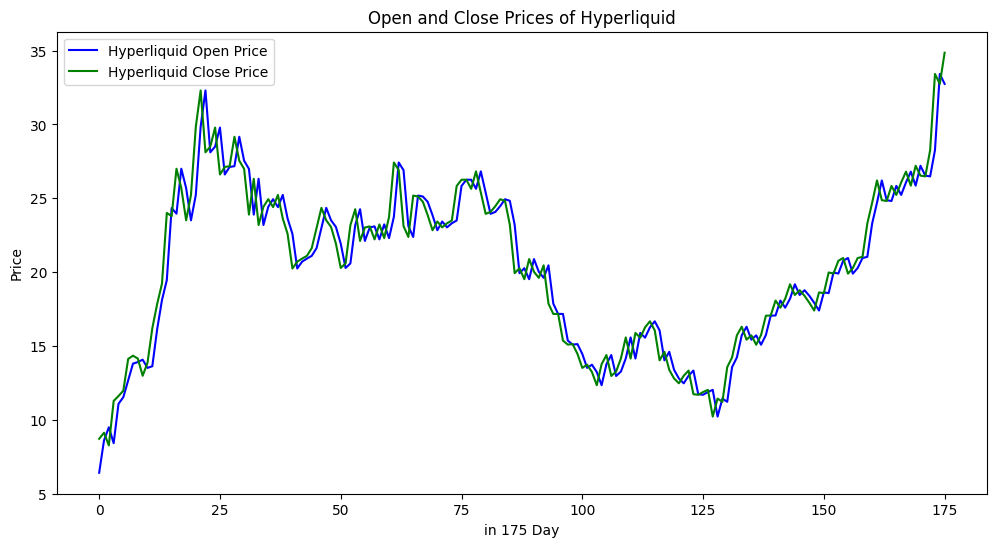

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(HYPE['open'], label='Hyperliquid Open Price', color='blue')
plt.plot(HYPE['close'], label='Hyperliquid Close Price', color='green')
plt.title('Open and Close Prices of Hyperliquid')
plt.xlabel('in 175 Day')
plt.ylabel('Price')
plt.legend()
plt.show()

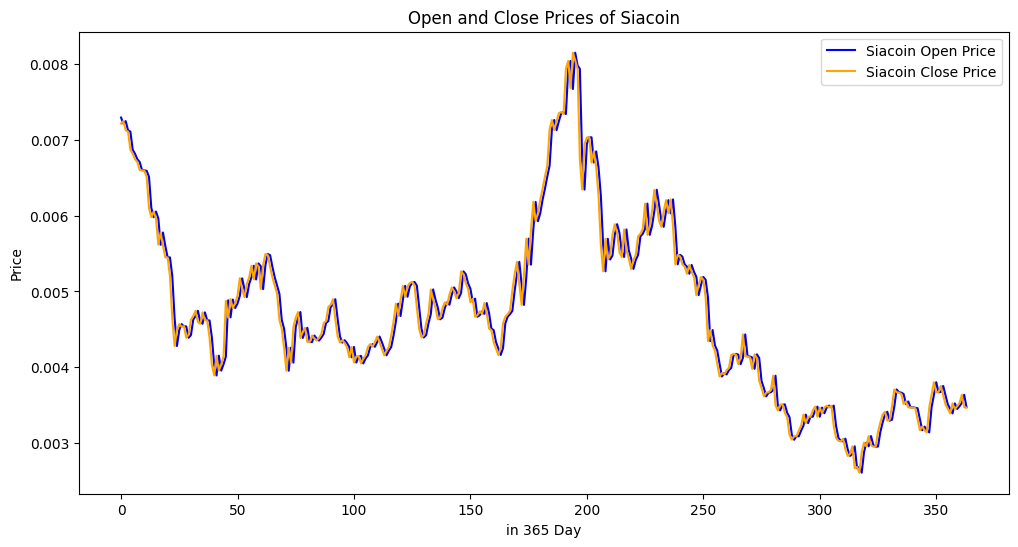

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(SIA['open'], label='Siacoin Open Price', color='blue')
plt.plot(SIA['close'], label='Siacoin Close Price', color='orange')
plt.title('Open and Close Prices of Siacoin')
plt.xlabel('in 365 Day')
plt.ylabel('Price')
plt.legend()
plt.show()

plot 2 - Trading volume

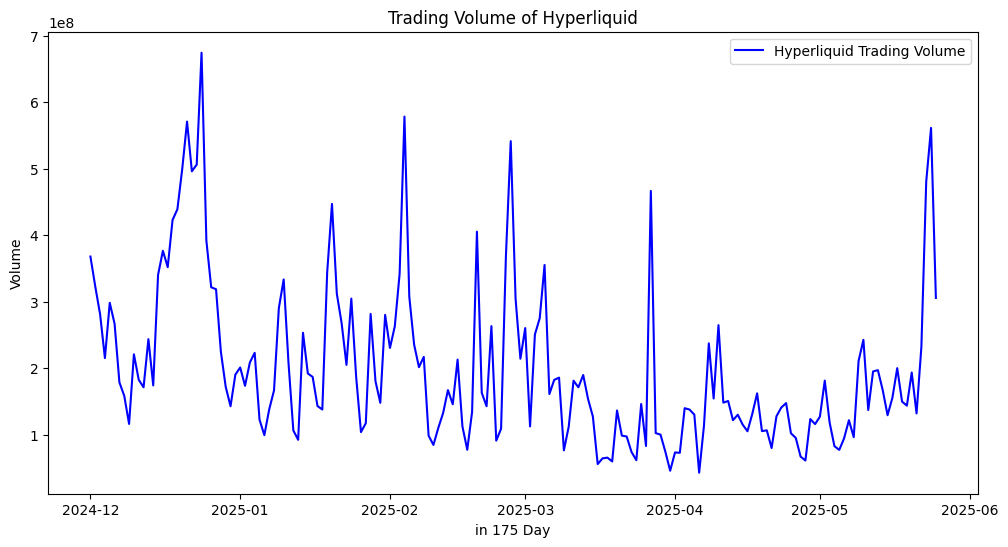

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(HYPE['timestamp'],HYPE['volume'], label='Hyperliquid Trading Volume', color='blue', linestyle='-')
plt.title('Trading Volume of Hyperliquid')
plt.xlabel('in 175 Day')
plt.ylabel('Volume')
plt.legend()
plt.show()

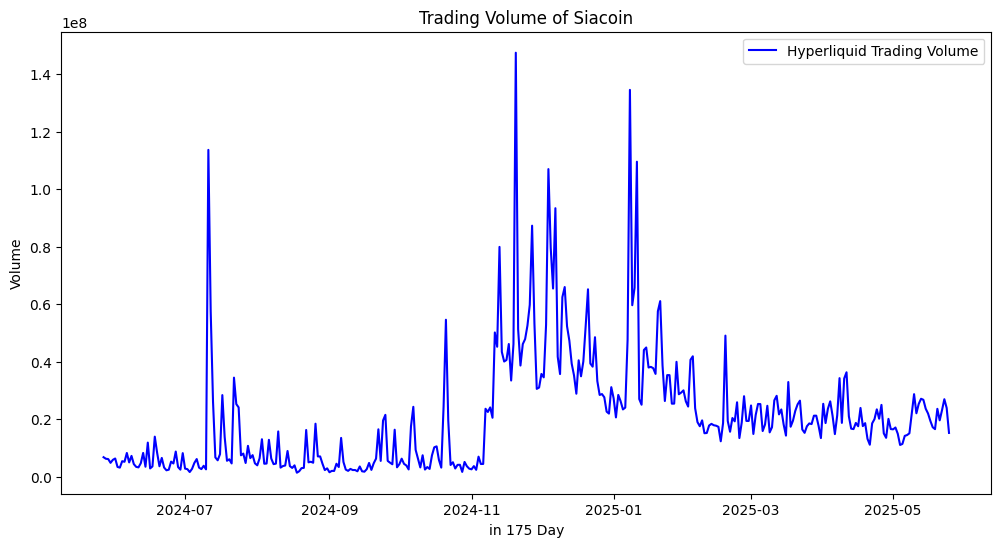

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(SIA['timestamp'],SIA['volume'], label='Hyperliquid Trading Volume', color='blue', linestyle='-')
plt.title('Trading Volume of Siacoin')
plt.xlabel('in 175 Day')
plt.ylabel('Volume')
plt.legend()
plt.show()

plot 3 - check correlation between features

In [17]:
HYPE_num = HYPE.select_dtypes(include=[np.number])
SIA_num = SIA.select_dtypes(include=[np.number])

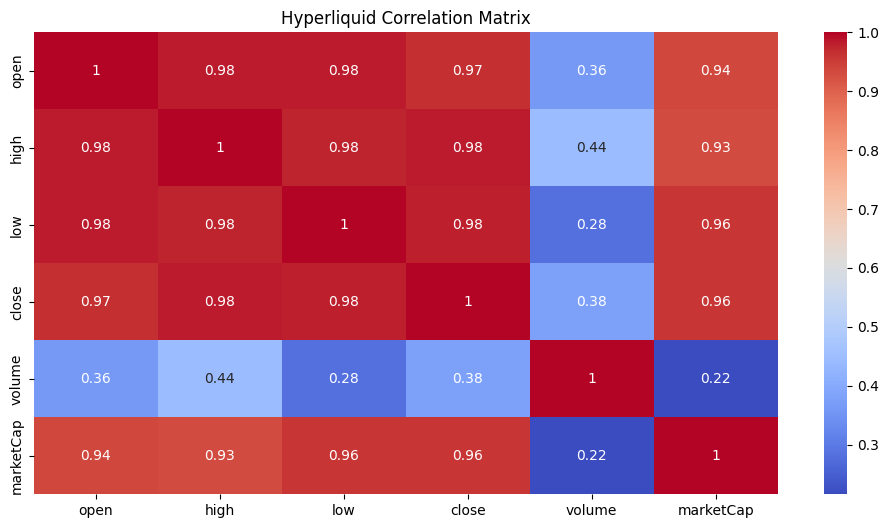

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(HYPE_num.corr(), annot=True, cmap='coolwarm')
plt.title('Hyperliquid Correlation Matrix')
plt.show()

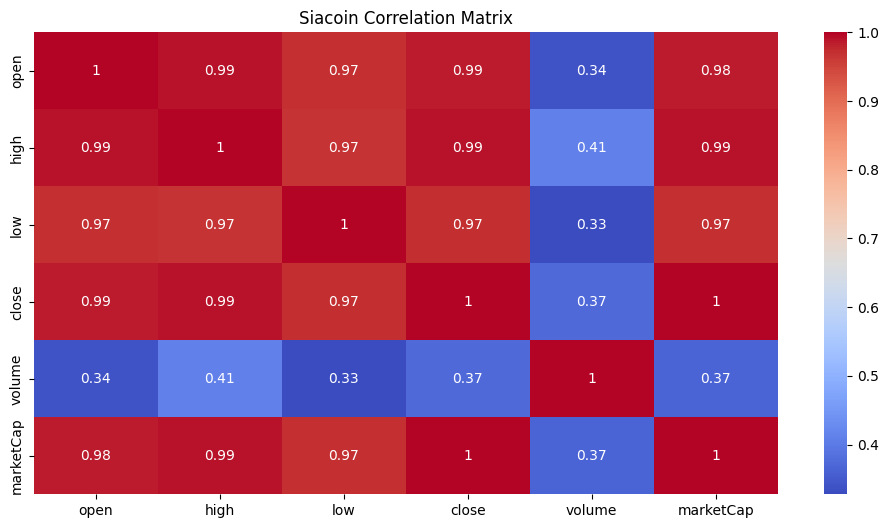

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(SIA_num.corr(), annot=True, cmap='coolwarm')
plt.title('Siacoin Correlation Matrix')
plt.show()

convert the data into date time then create a date filter
- HYPE 2024-11-30 - 2025-05-24
- SC 2024-05-26 - 2025-05-24

In [20]:
prediction_HYPE = HYPE.loc[
    (HYPE['timeOpen'] > datetime(2024, 11, 30)) &
    (HYPE['timeOpen'] <= datetime(2025, 5, 24))
]

prediction_SIA = SIA.loc[
    (SIA['timeOpen'] > datetime(2024, 5, 26)) &
    (SIA['timeOpen'] <= datetime(2025, 5, 24))
]

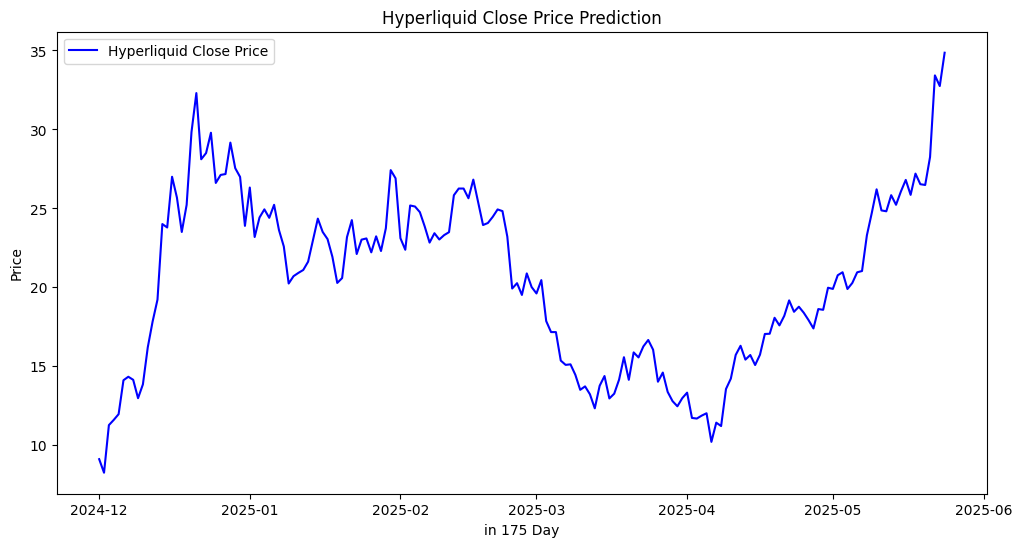

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(prediction_HYPE['timeOpen'], prediction_HYPE['close'], label='Hyperliquid Close Price',color="blue")
plt.xlabel('in 175 Day')
plt.ylabel('Price')
plt.title('Hyperliquid Close Price Prediction')
plt.legend()
plt.show()

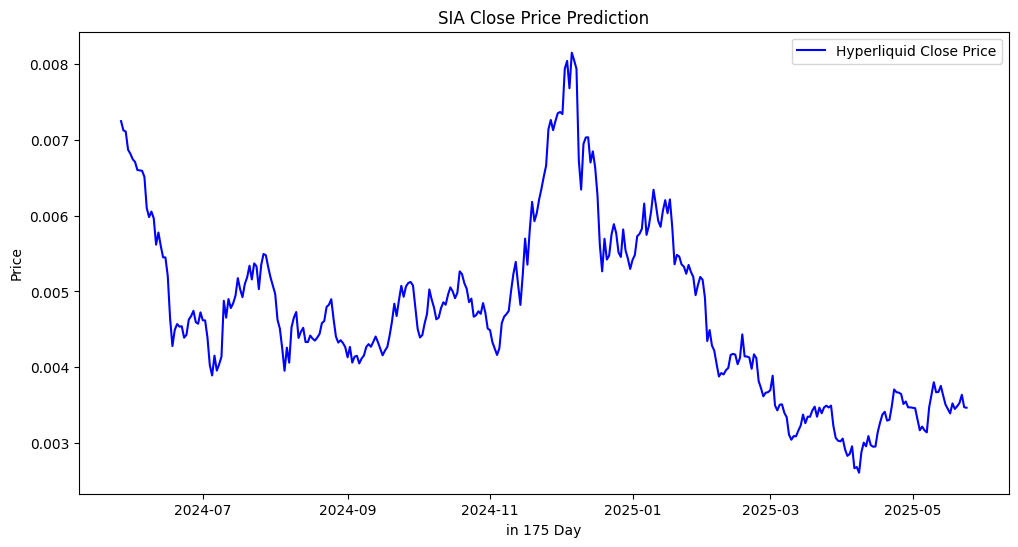

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(prediction_SIA['timeOpen'], prediction_SIA['close'], label='Hyperliquid Close Price',color="blue")
plt.xlabel('in 175 Day')
plt.ylabel('Price')
plt.title('SIA Close Price Prediction')
plt.legend()
plt.show()

prepare for the LSTM model (sequential)

HYPE

In [23]:
hype_close = HYPE.filter(["close"])
df_hype = hype_close.values
training_df_hype_len = int(np.ceil(len(df_hype) * 0.95))
scaler_1 = StandardScaler()

# Fix: Reshape to 2D array for StandardScaler
scaled_df_hype = scaler_1.fit_transform(df_hype)
train_hype = scaled_df_hype[:training_df_hype_len]
X_train_HYPE, y_train_HYPE = [], []

for i in range(30, len(train_hype)):
    X_train_HYPE.append(train_hype[i-30:i,0])
    y_train_HYPE.append(train_hype[i,0])

X_train_HYPE, y_train_HYPE = np.array(X_train_HYPE), np.array(y_train_HYPE)

X_train_HYPE = np.reshape(X_train_HYPE, (X_train_HYPE.shape[0], X_train_HYPE.shape[1], 1))

# HYPE Model
model_hype = keras.models.Sequential()
model_hype.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train_HYPE.shape[1], 1)))
model_hype.add(keras.layers.LSTM(units=64, return_sequences=False))
model_hype.add(keras.layers.Dense(128, activation="relu"))
model_hype.add(keras.layers.Dropout(0.5))
model_hype.add(keras.layers.Dense(units=1))

# Compile and train HYPE model
model_hype.summary()
model_hype.compile(optimizer='adam', loss="mae", metrics=[keras.metrics.RootMeanSquaredError()])
print("Training HYPE model...")
model_hype.fit(X_train_HYPE, y_train_HYPE, epochs=20, batch_size=32, verbose=1)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Training HYPE model...
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.6501 - root_mean_squared_error: 0.7689
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5220 - root_mean_squared_error: 0.6141
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4464 - root_mean_squared_error: 0.5267
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3735 - root_mean_squared_error: 0.4684
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3546 - root_mean_squared_error: 0.4426
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3251 - root_mean_squared_error: 0.4048
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2994 - root_mean_squared_error: 0.3870
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2754 - root_mean_squared_error: 0.3453
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2939 - root_mean_squared_error: 0.3695
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2766 - root_mean_squared_error: 0.3

In [24]:
test_hype = scaled_df_hype[training_df_hype_len - 30: ]
X_test_hype, y_test_hype = [], df_hype[training_df_hype_len:]

for i in range(30, len(test_hype)):
    X_test_hype.append(test_hype[i-30:i,0])

X_test_hype = np.array(X_test_hype)
X_test_hype = np.reshape(X_test_hype, (X_test_hype.shape[0], X_test_hype.shape[1], 1))

In [25]:
pred_hype = model_hype.predict(X_test_hype)
pred_hype = scaler_1.inverse_transform(pred_hype)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


In [26]:
train_hypes = hype_close[:training_df_hype_len]
test_hypes = hype_close[training_df_hype_len:]

test_hypes = test_hypes.copy()

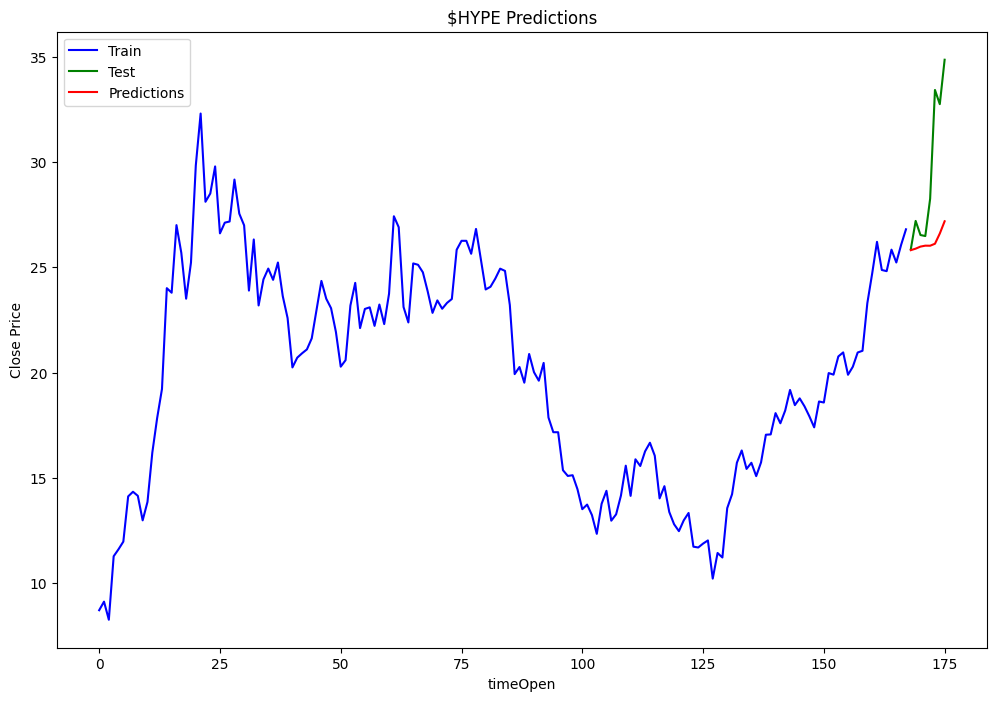

In [27]:
test_hypes['Prediction'] = pred_hype

plt.figure(figsize=(12, 8))
plt.plot( train_hypes['close'], label='Train', color='blue')
plt.plot( test_hypes['close'], label='Test', color='green')
plt.plot( test_hypes['Prediction'], label='Predictions', color='red')
plt.title("$HYPE Predictions")
plt.xlabel("timeOpen")
plt.ylabel("Close Price")
plt.legend()
plt.show()

SIA

In [28]:
sia_close = SIA.filter(['close'])
df_sia = sia_close.values
training_df_sia_len = int(np.ceil(len(df_sia) * 0.95))
scaler_2 = StandardScaler()

# Fix: Reshape to 2D array for StandardScaler
scaled_df_sia = df_sia.reshape(-1, 1)
train_sia = scaled_df_sia[:training_df_sia_len]
X_train_SIA, y_train_SIA = [], []

for x in range(30, len(train_sia)):
    X_train_SIA.append(train_sia[x-30:x,0])
    y_train_SIA.append(train_sia[x,0])


X_train_SIA, y_train_SIA = np.array(X_train_SIA), np.array(y_train_SIA)


X_train_SIA = np.reshape(X_train_SIA, (X_train_SIA.shape[0], X_train_SIA.shape[1], 1))


# SIA Model
model_sia = keras.models.Sequential()
model_sia.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape=(X_train_SIA.shape[1], 1)))
model_sia.add(keras.layers.LSTM(units=64, return_sequences=False))  # Fix: Last LSTM should not return sequences
model_sia.add(keras.layers.Dense(128, activation="relu"))
model_sia.add(keras.layers.Dropout(0.5))
model_sia.add(keras.layers.Dense(units=1))

# Compile and train SIA model
model_sia.summary()
model_sia.compile(optimizer='adam', loss="mae", metrics=[keras.metrics.RootMeanSquaredError()])
print("Training SIA model...")
model_sia.fit(X_train_SIA, y_train_SIA, epochs=20, batch_size=32, verbose=1)

print("Both models trained successfully!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Training SIA model...
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0055 - root_mean_squared_error: 0.0069
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025 - root_mean_squared_error: 0.0031
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - root_mean_squared_error: 0.0017
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - root_mean_squared_error: 0.0014
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.0190e-04 - root_mean_squared_error: 0.0011
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2319e-04 - root_mean_squared_error: 0.0012
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4408e-04 - root_mean_squared_error: 0.0011
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9002e-04 - root_mean_squared_error: 0.0012
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4154e-04 - root_mean_squared_error: 0.0011
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss:

In [29]:
test_sia = scaled_df_sia[training_df_sia_len - 30: ]
X_test_sia, y_test_sia = [], df_sia[training_df_sia_len:]

for i in range(30, len(test_sia)):
    X_test_sia.append(test_sia[i-30:i,0])

X_test_sia = np.array(X_test_sia)
X_test_sia = np.reshape(X_test_sia, (X_test_sia.shape[0], X_test_sia.shape[1], 1))

In [30]:
pred_sia = model_sia.predict(X_test_sia)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


In [31]:
train_sias = sia_close[:training_df_sia_len]
test_sias = sia_close[training_df_sia_len:]

test_sias = test_sias.copy()

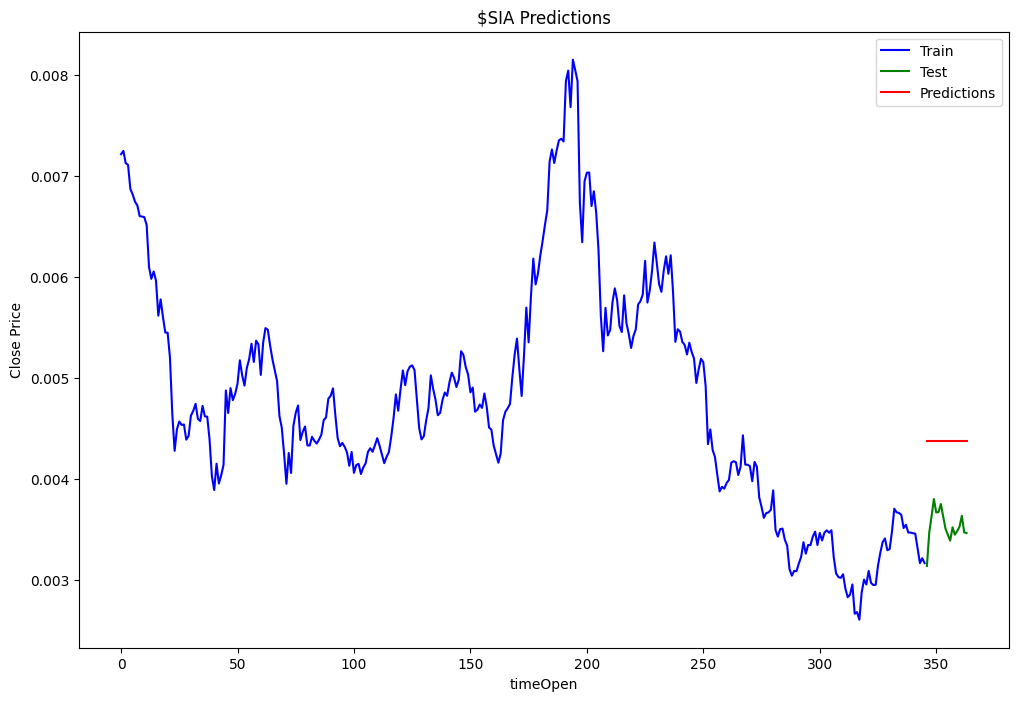

In [32]:
test_sias['Prediction'] = pred_sia

plt.figure(figsize=(12, 8))
plt.plot( train_sias['close'], label='Train', color='blue')
plt.plot( test_sias['close'], label='Test', color='green')
plt.plot( test_sias['Prediction'], label='Predictions', color='red')
plt.title("$SIA Predictions")
plt.xlabel("timeOpen")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# USING PRETRAINED Model

In [33]:
!pip install git+https://github.com/amazon-science/chronos-forecasting.git

  Cloning https://github.com/amazon-science/chronos-forecasting.git to /tmp/pip-req-build-041a5vfr
  Running command git clone --filter=blob:none --quiet https://github.com/amazon-science/chronos-forecasting.git /tmp/pip-req-build-041a5vfr
  Resolved https://github.com/amazon-science/chronos-forecasting.git to commit 6a9c8dadac04eb85befc935043e3e2cce914267f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline
import random

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-large",
  device_map="cuda",
  torch_dtype=torch.float32,
)

df = pd.read_parquet("hype.parquet")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [2]:
df = df.sort_values('timestamp').reset_index(drop=True)

# HYPERLIQUID

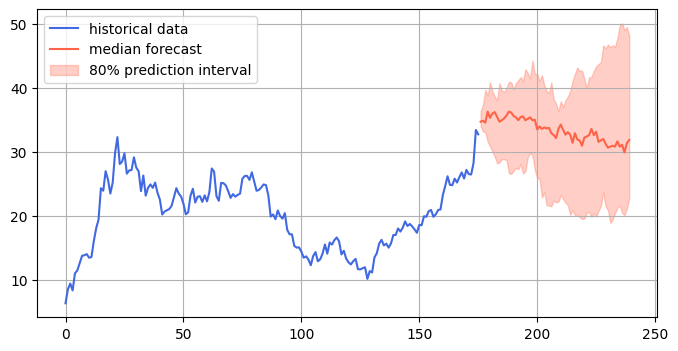

In [9]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["close"])
prediction_length = 64
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["open"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

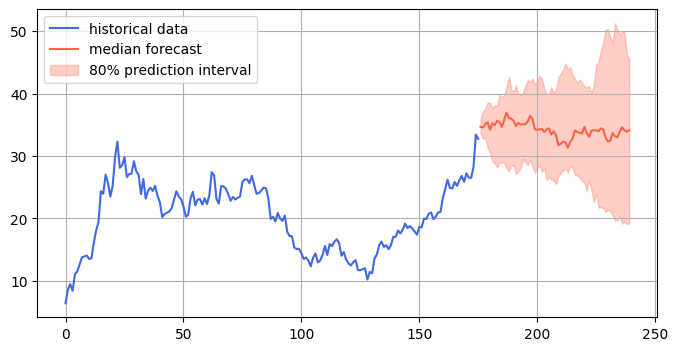

In [7]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["close"])
prediction_length = 64
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["open"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

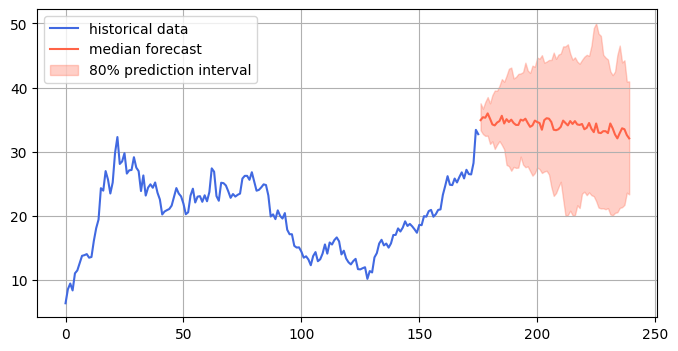

In [8]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["close"])
prediction_length = 64
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["open"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

SIA COIN

In [10]:
pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-large",
  device_map="cuda",
  torch_dtype=torch.float32,
)

In [14]:
df = pd.read_parquet('SIA.parquet')

In [15]:
df = df.sort_values('timestamp').reset_index(drop=True)

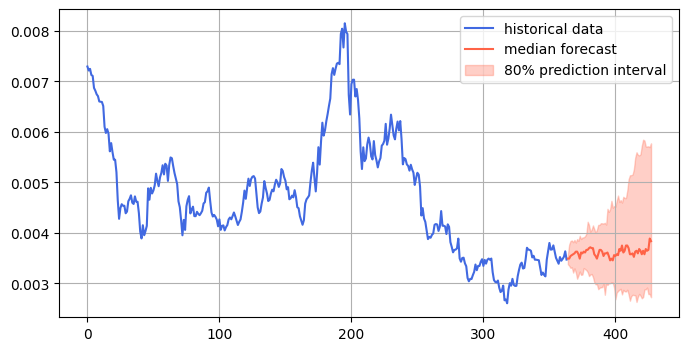

In [16]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["close"])
prediction_length = 64
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["open"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

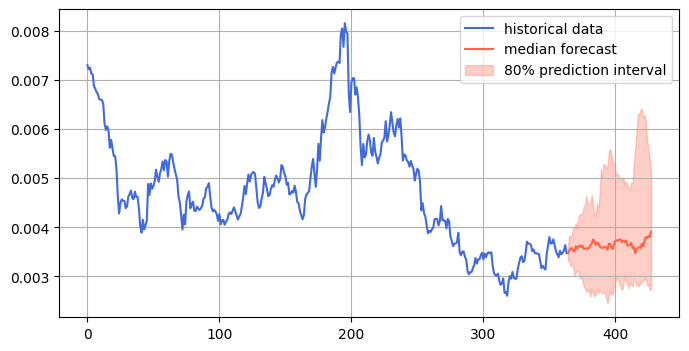

In [17]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["close"])
prediction_length = 64
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["open"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()

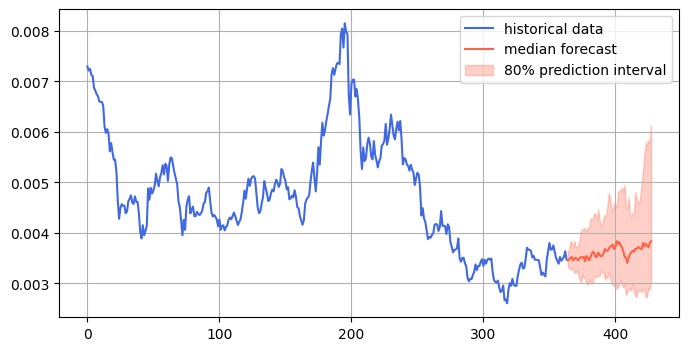

In [18]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["close"])
prediction_length = 64
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["open"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()